In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install h5py==2.10.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 49.8 MB/s eta 0:00:00
  Attempting uninstall: h5py
    Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully uninstalled h5py-3.1.0


In [ ]:
import tensorflow as tf
tf.__version__

'2.9.2'

In [ ]:
import tensorflow as tf
print("tensorflow version :{}".format(tf.__version__))
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

tensorflow version :2.9.2
Found GPU at: /device:GPU:0


In [ ]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 10213471577057670148
 xla_global_id: -1, name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 14415560704
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 6609803741582258123
 physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
 xla_global_id: 416903419]

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.utils import class_weight

In [ ]:
from keras.layers import Conv1D, Dense, Dropout, GlobalMaxPool1D
from keras.layers import TimeDistributed, LSTM, Bidirectional
from keras.models import Sequential, load_model
from keras.callbacks import ModelCheckpoint, Callback, EarlyStopping
from tensorflow.keras.utils import plot_model, to_categorical
from keras.losses import binary_crossentropy
from keras.optimizers import Adam
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
from sklearn.metrics import confusion_matrix
from keras.regularizers import l2
from tensorflow.keras.callbacks import LearningRateScheduler

In [ ]:
data_path = '/content/drive/MyDrive/CAV/data/Instant attack/1000/'

In [ ]:
sensor1_data = pd.read_csv(data_path + "Sensor1_values_instant_1000.csv", index_col= 'Unnamed: 0')
sensor1_data.head()

,InVehicle_Longitudinal_Speed,GPS_Speed,InVehicle_Longitudinal_Accel
0,11.375000,11.307097,-0.103000
1,11.366708,11.255964,-0.353946
2,11.362331,11.249115,-0.090962
3,11.358665,11.263280,-0.043470
4,11.356745,11.270361,-0.037579


In [ ]:
sensor1_label = pd.read_csv(data_path+"Ground_truth_instant_1000_sensor1.csv", names=['Class'])
sensor1_label.head()

,Class
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [ ]:
sensor2_data = pd.read_csv(data_path + "Sensor2_values_instant_1000.csv", index_col = "Unnamed: 0")
sensor2_data.head()

,InVehicle_Longitudinal_Speed,GPS_Speed,InVehicle_Longitudinal_Accel
0,11.375000,11.307097,-0.103000
1,11.366708,11.255964,-0.353946
2,11.362331,11.249115,-0.090962
3,11.358665,11.263280,-0.043470
4,11.356745,11.270361,-0.037579


In [ ]:
sensor2_label = pd.read_csv(data_path + "Ground_truth_instant_1000_sensor2.csv",names=['Class'])
sensor2_label.head()

,Class
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [ ]:
sensor3_data = pd.read_csv(data_path + "Sensor3_values_instant_1000.csv", index_col = "Unnamed: 0")
sensor3_data.head()

,InVehicle_Longitudinal_Speed,GPS_Speed,InVehicle_Longitudinal_Accel
0,11.375000,11.307097,-0.103000
1,11.366708,11.255964,-0.353946
2,11.362331,11.249115,-0.090962
3,11.358665,11.263280,-0.043470
4,11.356745,11.270361,-0.037579


In [ ]:
sensor3_label = pd.read_csv(data_path + "Ground_truth_instant_1000_sensor3.csv", names=['Class'])
sensor3_label.head()

,Class
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [ ]:
scaler = StandardScaler()
scaler.fit(sensor1_data)
sensor1_data_normal = scaler.transform(sensor1_data) 
sensor1_data_normal[:5]

array([[-0.42758061, -0.45496391, -0.06123049],
       [-0.42867985, -0.46182449, -0.23818589],
       [-0.42926014, -0.46274334, -0.05274183],
       [-0.42974619, -0.46084285, -0.01925279],
       [-0.43000068, -0.45989275, -0.0150985 ]])

In [ ]:
scaler = StandardScaler()
scaler.fit(sensor2_data)
sensor2_data_normal = scaler.transform(sensor2_data) 
sensor2_data_normal[:5]

array([[-0.4277704 , -0.45427446, -0.072614  ],
       [-0.42886887, -0.4611232 , -0.25589856],
       [-0.42944876, -0.46204047, -0.06382173],
       [-0.42993448, -0.46014326, -0.02913489],
       [-0.43018879, -0.4591948 , -0.02483202]])

In [ ]:
scaler = StandardScaler()
scaler.fit(sensor3_data)
sensor3_data_normal = scaler.transform(sensor3_data) #
sensor3_data_normal[:5]

array([[-0.42758061, -0.45496391, -0.06123049],
       [-0.42867985, -0.46182449, -0.23818589],
       [-0.42926014, -0.46274334, -0.05274183],
       [-0.42974619, -0.46084285, -0.01925279],
       [-0.43000068, -0.45989275, -0.0150985 ]])

In [ ]:
window_size = 10

# create windows with overlap
def convertToFrames(X_data,y_data, step):
    #data = np.append(data,np.repeat(data[-1,],step))
    X, Y =[], []
    
    for i in range(len(X_data)-step):
        y_or = 0
        d=i+step  
        X.append(X_data[i:d,])
        for y in y_data.iloc[i:d].values:
           y_or = y_or or y
        
        Y.append(y_or)
    return np.array(X), np.array(Y)

In [ ]:
X_sensor1, y_sensor1 = convertToFrames(sensor1_data_normal, sensor1_label, window_size)
X_sensor1.shape, y_sensor1.shape

((29790, 10, 3), (29790, 1))

In [ ]:
X_sensor2, y_sensor2 = convertToFrames(sensor2_data_normal, sensor2_label, window_size)
X_sensor2.shape, y_sensor2.shape

((29790, 10, 3), (29790, 1))

In [ ]:
X_sensor3, y_sensor3 = convertToFrames(sensor3_data_normal, sensor3_label, window_size)
X_sensor3.shape, y_sensor3.shape

((29790, 10, 3), (29790, 1))

In [ ]:
y_sensor1 = to_categorical(y_sensor1, num_classes= 2, dtype='float32')
X_train_sensor1,X_test_sensor1, y_train_sensor1, y_test_sensor1 = train_test_split(X_sensor1,y_sensor1,random_state = 1400, test_size= 0.2)
X_train_sensor1 = np.reshape(X_train_sensor1, (X_train_sensor1.shape[0],  X_train_sensor1.shape[1],X_train_sensor1.shape[2], 1))
X_test_sensor1 = np.reshape(X_test_sensor1, (X_test_sensor1.shape[0],X_test_sensor1.shape[1],X_test_sensor1.shape[2], 1))
y_train_sensor1, y_test_sensor1 = y_train_sensor1.squeeze(), y_test_sensor1.squeeze()
X_train_sensor1.shape, X_test_sensor1.shape,y_train_sensor1.shape, y_test_sensor1.shape

((23832, 10, 3, 1), (5958, 10, 3, 1), (23832, 2), (5958, 2))

In [ ]:
y_sensor2 = to_categorical(y_sensor2, num_classes= 2, dtype='float32')
X_train_sensor2,X_test_sensor2, y_train_sensor2, y_test_sensor2 = train_test_split(X_sensor2,y_sensor2,random_state = 1400, test_size= 0.2)
X_train_sensor2 = np.reshape(X_train_sensor2, (X_train_sensor2.shape[0],  X_train_sensor2.shape[1],X_train_sensor2.shape[2], 1))
X_test_sensor2 = np.reshape(X_test_sensor2, (X_test_sensor2.shape[0],X_test_sensor2.shape[1],X_test_sensor2.shape[2], 1))
y_train_sensor2, y_test_sensor2 = y_train_sensor2.squeeze(), y_test_sensor2.squeeze()
X_train_sensor2.shape, X_test_sensor2.shape,y_train_sensor2.shape, y_test_sensor2.shape

((23832, 10, 3, 1), (5958, 10, 3, 1), (23832, 2), (5958, 2))

In [ ]:
y_sensor3 = to_categorical(y_sensor3, num_classes= 2, dtype='float32')
X_train_sensor3,X_test_sensor3, y_train_sensor3, y_test_sensor3 = train_test_split(X_sensor3,y_sensor3,random_state = 1400, test_size= 0.2)
X_train_sensor3 = np.reshape(X_train_sensor3, (X_train_sensor3.shape[0],  X_train_sensor3.shape[1],X_train_sensor3.shape[2], 1))
X_test_sensor3 = np.reshape(X_test_sensor3, (X_test_sensor3.shape[0],X_test_sensor3.shape[1],X_test_sensor3.shape[2], 1))
y_train_sensor3, y_test_sensor3 = y_train_sensor3.squeeze(), y_test_sensor3.squeeze()
X_train_sensor3.shape, X_test_sensor3.shape,y_train_sensor3.shape, y_test_sensor3.shape

((23832, 10, 3, 1), (5958, 10, 3, 1), (23832, 2), (5958, 2))

In [ ]:
# _tags = np.unique(sensor1_label['Class'])
# class_weights = class_weight.compute_class_weight('balanced', _tags, sensor1_label.Class)
# print(_tags)
# print(class_weights)

In [ ]:
def creatModel():
  model = Sequential()
  ## CNN 
  model.add(TimeDistributed( Conv1D(kernel_size=3, filters= 40, activation= 'relu', padding='same',
                   input_shape=(X_train_sensor1.shape[0], X_train_sensor1.shape[1],))))
  model.add(TimeDistributed(Dropout(0.2)))
  model.add(TimeDistributed( Conv1D(kernel_size=3, filters= 60, activation= 'relu', padding='same')))
  model.add(TimeDistributed(Dropout(0.2)))
  model.add(TimeDistributed(Conv1D(kernel_size=3, filters= 60, activation= 'relu', padding='same')))
  # model.add(MaxPooling1D((2,)))
  model.add(TimeDistributed(GlobalMaxPool1D()))
  model.add(TimeDistributed(Dropout(0.2)))
  ##BiLSTM
  model.add(Bidirectional(LSTM(60)))
  model.add(Dense(units= 30))
  model.add(Dropout(0.2))

  model.add(Dense(2, activation='sigmoid'))#, kernel_regularizer=l2()

  model.compile(optimizer = Adam(), loss= 'binary_crossentropy',  metrics=['accuracy'])
  return model

In [ ]:
model_path = '/content/drive/MyDrive/CAV/data/Instant attack/1000/Models/Models18/'

class Model_save(Callback):
  def on_epoch_end(self, epoch, logs={}):
    self.model.save(model_path + "MultiCNN-BiLSTM-CAV-StandarNormal-Instant1000-PerEpochs_{}.h5".format(sensor))

In [ ]:
def settCallbacks(sensor):

  best_model_path = model_path + 'Best_MultiCNN-BiLSTM-CAV-standardNormal-Instant1000_{}.h5'.format(sensor)
  checkpoint = ModelCheckpoint(best_model_path, monitor='val_loss', save_best_only=True, mode='min')

  history_cb = tf.keras.callbacks.CSVLogger(model_path + 'historyLOG_{}.csv'.format(sensor), separator=",", append=True)

  model_save = Model_save()

  Estop = EarlyStopping(monitor='val_accuracy', patience= 200)
  
  return model_save, checkpoint, history_cb, Estop

In [ ]:
import time

class TimeHistory(Callback):
  
    def on_epoch_begin(self, batch, logs={}):
        self.epoch_time_start = time.time()

    def on_epoch_end(self, batch, logs={}):
        epoch_time = time.time() - self.epoch_time_start
        logs['epoch_time'] = epoch_time

In [ ]:
sensor = "sensor1"
time_callback = TimeHistory()
model_sensor1 = creatModel()
model_save, checkpoint, history_cb, Estop = settCallbacks("sensor1")
history_sensor1 = model_sensor1.fit(X_train_sensor1, y_train_sensor1,
                                    batch_size = 64, epochs = 300,
                                    validation_split = 0.2,
                                    verbose = 1,
                                    callbacks = [time_callback, model_save, checkpoint, history_cb, Estop])
                                    # class_weight= class_weights)

Epoch 1/300
298/298 [==============================] - 23s 13ms/step - loss: 0.4598 - accuracy: 0.8348 - val_loss: 0.4487 - val_accuracy: 0.8370 - epoch_time: 22.4675
Epoch 2/300
298/298 [==============================] - 3s 10ms/step - loss: 0.4463 - accuracy: 0.8352 - val_loss: 0.3771 - val_accuracy: 0.8540 - epoch_time: 2.7031
Epoch 3/300
298/298 [==============================] - 3s 10ms/step - loss: 0.2780 - accuracy: 0.8960 - val_loss: 0.2185 - val_accuracy: 0.9220 - epoch_time: 2.7216
Epoch 4/300
298/298 [==============================] - 3s 10ms/step - loss: 0.2255 - accuracy: 0.9185 - val_loss: 0.1863 - val_accuracy: 0.9320 - epoch_time: 2.7434
Epoch 5/300
298/298 [==============================] - 3s 10ms/step - loss: 0.2028 - accuracy: 0.9271 - val_loss: 0.1795 - val_accuracy: 0.9394 - epoch_time: 2.8232
Epoch 6/300
298/298 [==============================] - 3s 10ms/step - loss: 0.1838 - accuracy: 0.9353 - val_loss: 0.1463 - val_accuracy: 0.9507 - epoch_time: 2.7691
Epoch 7/

In [ ]:
model_sensor1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed (TimeDistr  (None, 10, 3, 40)        160       
 ibuted)                                                         
                                                                 
 time_distributed_1 (TimeDis  (None, 10, 3, 40)        0         
 tributed)                                                       
                                                                 
 time_distributed_2 (TimeDis  (None, 10, 3, 60)        7260      
 tributed)                                                       
                                                                 
 time_distributed_3 (TimeDis  (None, 10, 3, 60)        0         
 tributed)                                                       
                                                                 
 time_distributed_4 (TimeDis  (None, 10, 3, 60)        1

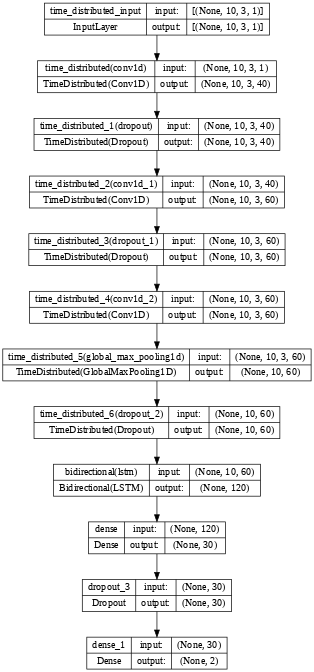

In [ ]:
plot_model(model= model_sensor1, show_shapes= True, dpi=50)

In [ ]:
sensor = "sensor2"
time_callback = TimeHistory()
model_sensor2 = creatModel()
model_save, checkpoint, history_cb, Estop = settCallbacks("sensor2")
history_sensor2 = model_sensor2.fit(X_train_sensor2, y_train_sensor2,
                                    batch_size = 64, epochs = 300,
                                    validation_split = 0.2,
                                    verbose = 1,
                                    callbacks = [time_callback,model_save, checkpoint, history_cb, Estop])
                                    # class_weight= class_weights)

Epoch 1/300
298/298 [==============================] - 7s 12ms/step - loss: 0.4427 - accuracy: 0.8448 - val_loss: 0.4197 - val_accuracy: 0.8504 - epoch_time: 6.9862
Epoch 2/300
298/298 [==============================] - 3s 10ms/step - loss: 0.3817 - accuracy: 0.8563 - val_loss: 0.2620 - val_accuracy: 0.9066 - epoch_time: 2.8028
Epoch 3/300
298/298 [==============================] - 3s 10ms/step - loss: 0.2565 - accuracy: 0.9041 - val_loss: 0.2192 - val_accuracy: 0.9182 - epoch_time: 2.8022
Epoch 4/300
298/298 [==============================] - 3s 10ms/step - loss: 0.2272 - accuracy: 0.9118 - val_loss: 0.2021 - val_accuracy: 0.9207 - epoch_time: 2.8200
Epoch 5/300
298/298 [==============================] - 3s 10ms/step - loss: 0.2052 - accuracy: 0.9206 - val_loss: 0.1852 - val_accuracy: 0.9350 - epoch_time: 2.7724
Epoch 6/300
298/298 [==============================] - 3s 10ms/step - loss: 0.1864 - accuracy: 0.9344 - val_loss: 0.1675 - val_accuracy: 0.9490 - epoch_time: 2.8697
Epoch 7/30

In [ ]:
sensor = "sensor3"
time_callback = TimeHistory()
model_sensor3 = creatModel()
model_save, checkpoint, history_cb, Estop = settCallbacks("sensor3")
history_sensor3 = model_sensor3.fit(X_train_sensor3, y_train_sensor3,
                                    batch_size = 64, epochs = 300,
                                    validation_split = 0.2,
                                    verbose = 1,
                                    callbacks = [time_callback,model_save, checkpoint, history_cb, Estop])
                                    # class_weight= class_weights)

Epoch 1/300
298/298 [==============================] - 18s 13ms/step - loss: 0.2374 - accuracy: 0.9233 - val_loss: 0.1064 - val_accuracy: 0.9719 - epoch_time: 17.6244
Epoch 2/300
298/298 [==============================] - 3s 10ms/step - loss: 0.1010 - accuracy: 0.9757 - val_loss: 0.0836 - val_accuracy: 0.9803 - epoch_time: 2.8462
Epoch 3/300
298/298 [==============================] - 3s 10ms/step - loss: 0.0881 - accuracy: 0.9794 - val_loss: 0.0716 - val_accuracy: 0.9834 - epoch_time: 2.8824
Epoch 4/300
298/298 [==============================] - 3s 10ms/step - loss: 0.0824 - accuracy: 0.9814 - val_loss: 0.0678 - val_accuracy: 0.9853 - epoch_time: 2.8492
Epoch 5/300
298/298 [==============================] - 3s 11ms/step - loss: 0.0827 - accuracy: 0.9817 - val_loss: 0.0712 - val_accuracy: 0.9843 - epoch_time: 3.0479
Epoch 6/300
298/298 [==============================] - 6s 21ms/step - loss: 0.0794 - accuracy: 0.9827 - val_loss: 0.0670 - val_accuracy: 0.9855 - epoch_time: 5.5863
Epoch 7/

In [ ]:
#plot history of model_sensor1
history_sensor1 = pd.read_csv(model_path+"historyLOG_sensor1.csv", index_col='epoch')
history_sensor1.reset_index(drop= True, inplace= True)
history_sensor1.head()
print('Average Exe_time for sensor1: {} sec.'.format(round(np.mean(history_sensor1['epoch_time'].values),3)))

Average Exe_time for sensor1: 2.969 sec.


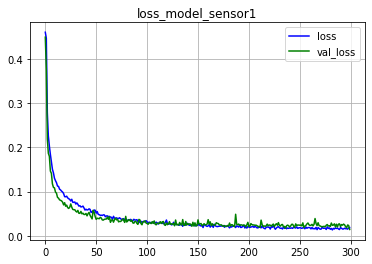

In [ ]:
plt.plot( history_sensor1['loss'], 'b',label = 'loss')
plt.plot( history_sensor1['val_loss'], 'g', label = 'val_loss')
plt.legend()
plt.grid()
plt.title('loss_model_sensor1')
plt.show()

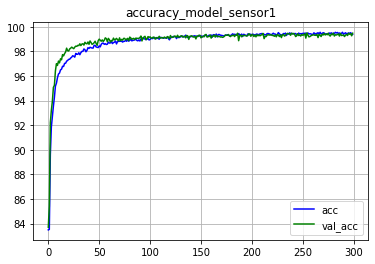

In [ ]:
plt.plot(history_sensor1['accuracy']* 100,'b',label = 'acc')
plt.plot(history_sensor1['val_accuracy'] * 100,'g', label = 'val_acc')
plt.legend()
plt.grid()
plt.title('accuracy_model_sensor1')
plt.show()

In [ ]:
#plot history of model_sensor2
history_sensor2 = pd.read_csv(model_path+"historyLOG_sensor2.csv", index_col='epoch')
history_sensor2.head()
print('Average Exe_time for sensor2: {} sec.'.format(round(np.mean(history_sensor2['epoch_time'].values),3)))

Average Exe_time for sensor2: 2.958 sec.


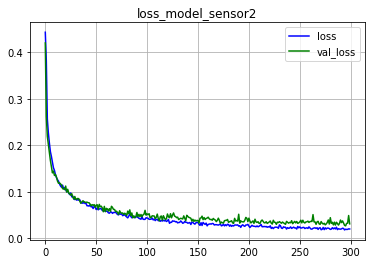

In [ ]:
plt.plot( history_sensor2['loss'], 'b',label = 'loss')
plt.plot( history_sensor2['val_loss'], 'g', label = 'val_loss')
plt.legend()
plt.grid()
plt.title('loss_model_sensor2')
plt.show()

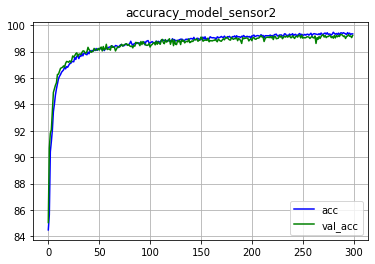

In [ ]:
plt.plot(history_sensor2['accuracy']* 100,'b',label = 'acc')
plt.plot(history_sensor2['val_accuracy'] * 100,'g', label = 'val_acc')
plt.legend()
plt.grid()
plt.title('accuracy_model_sensor2')
plt.show()

In [ ]:
#plot history of model_sensor3
history_sensor3 = pd.read_csv(model_path+"historyLOG_sensor3.csv", index_col='epoch')
history_sensor3.head()
print('Average Exe_time for sensor3: {} sec.'.format(round(np.mean(history_sensor3['epoch_time'].values),3)))

Average Exe_time for sensor3: 3.036 sec.


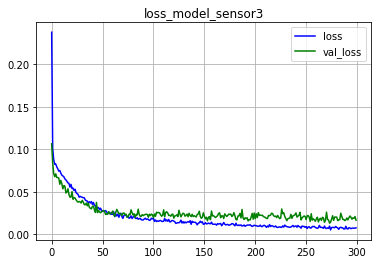

In [ ]:
plt.plot( history_sensor3['loss'], 'b',label = 'loss')
plt.plot( history_sensor3['val_loss'], 'g', label = 'val_loss')
plt.legend()
plt.grid()
plt.title('loss_model_sensor3')
plt.show()

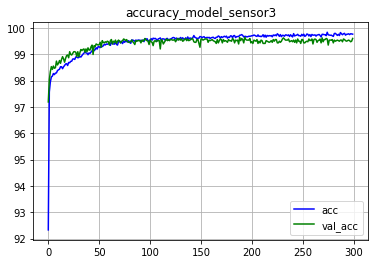

In [ ]:
plt.plot(history_sensor3['accuracy']* 100,'b',label = 'acc')
plt.plot(history_sensor3['val_accuracy'] * 100,'g', label = 'val_acc')
plt.legend()
plt.grid()
plt.title('accuracy_model_sensor3')
plt.show()

In [ ]:
model_sensor1 = load_model(model_path + "MultiCNN-BiLSTM-CAV-StandarNormal-Instant1000-PerEpochs_sensor1.h5")
model_sensor2 = load_model(model_path + "MultiCNN-BiLSTM-CAV-StandarNormal-Instant1000-PerEpochs_sensor2.h5")
model_sensor3 = load_model(model_path + "MultiCNN-BiLSTM-CAV-StandarNormal-Instant1000-PerEpochs_sensor3.h5")

In [ ]:
#last model_sensor1 evaluation
test_loss, test_acc = model_sensor1.evaluate( X_test_sensor1, y_test_sensor1, verbose= 1)
print('test accuracy :{:.1%} \n test loss :{:.3}'.format(test_acc, test_loss))

187/187 [==============================] - 8s 4ms/step - loss: 0.0194 - accuracy: 0.9931
test accuracy :99.3% 
 test loss :0.0194


In [ ]:
2#last model_sensor2 evaluation
test_loss, test_acc = model_sensor2.evaluate( X_test_sensor2, y_test_sensor2, verbose= 1)
print('test accuracy :{:.1%} \n test loss :{:.3}'.format(test_acc, test_loss))

187/187 [==============================] - 1s 4ms/step - loss: 0.0173 - accuracy: 0.9956
test accuracy :99.6% 
 test loss :0.0173


In [ ]:
#last model_sensor3 evaluation
test_loss, test_acc = model_sensor3.evaluate( X_test_sensor3, y_test_sensor3, verbose= 1)
print('test accuracy :{:.1%} \n test loss :{:.3}'.format(test_acc, test_loss))

187/187 [==============================] - 2s 4ms/step - loss: 0.0200 - accuracy: 0.9955
test accuracy :99.5% 
 test loss :0.02


In [ ]:
y_pred_sensor1 = model_sensor1.predict( X_test_sensor1, verbose= 1)
y_pred_sensor2 = model_sensor2.predict( X_test_sensor2, verbose= 1)
y_pred_sensor3 = model_sensor3.predict( X_test_sensor3, verbose= 1)

187/187 [==============================] - 1s 3ms/step


In [ ]:
y_pred_sensor1[0]

array([0.99641067, 0.00359289], dtype=float32)

In [ ]:
y_pred_sensor1 = [np.argmax(i) for i in y_pred_sensor1]
y_pred_sensor2 = [np.argmax(i) for i in y_pred_sensor2]
y_pred_sensor3 = [np.argmax(i) for i in y_pred_sensor3]

In [ ]:
y_pred_total = []
for i in range(len(y_pred_sensor1)):
  y_pred_total.append( y_pred_sensor1[i] or y_pred_sensor2[i] or y_pred_sensor3[i])

In [ ]:
assert(len(y_pred_total) == len(y_pred_sensor1))

In [ ]:
y_test_sensor1 = [np.argmax(i) for i in y_test_sensor1]
y_test_sensor2 = [np.argmax(i) for i in y_test_sensor2]
y_test_sensor3 = [np.argmax(i) for i in y_test_sensor3]

In [ ]:
y_test_total = []
for i in range(len(y_test_sensor1)):
  y_test_total.append(y_test_sensor1[i] or y_test_sensor2[i] or y_test_sensor3[i])

In [ ]:
print("Sensor 1 performanace:")
recall = recall_score(y_test_sensor1, y_pred_sensor1, average='macro')
print('recall score : {:.2%}\n'.format(recall ))

precision = precision_score(y_test_sensor1, y_pred_sensor1, average='macro')
print('precision score: {:.2%}\n'.format(precision ))

f1 = f1_score(y_test_sensor1, y_pred_sensor1, average='macro')
print("F1 score: {:.2%}\n".format(f1 ))

accuracy = accuracy_score(y_test_sensor1, y_pred_sensor1)
print("accuracy score: {:.2%}\n".format(accuracy))

Sensor 1 performanace:
recall score : 98.59%

precision score: 98.88%

F1 score: 98.74%

accuracy score: 99.31%



In [ ]:
print("Sensor 2 performanace:")
recall = recall_score(y_test_sensor2, y_pred_sensor2, average='macro')
print('recall score : {:.2%}\n'.format(recall ))

precision = precision_score(y_test_sensor2, y_pred_sensor2, average='macro')
print('precision score: {:.2%}\n'.format(precision ))

f1 = f1_score(y_test_sensor2, y_pred_sensor2, average='macro')
print("F1 score: {:.2%}\n".format(f1 ))

accuracy = accuracy_score(y_test_sensor2, y_pred_sensor2)
print("accuracy score: {:.2%}\n".format(accuracy))

Sensor 2 performanace:
recall score : 98.95%

precision score: 99.39%

F1 score: 99.17%

accuracy score: 99.56%



In [ ]:
print("Sensor 3 performanace:")
recall = recall_score(y_test_sensor3, y_pred_sensor3, average='macro')
print('recall score : {:.2%}\n'.format(recall ))

precision = precision_score(y_test_sensor3, y_pred_sensor3, average='macro')
print('precision score: {:.2%}\n'.format(precision ))

f1 = f1_score(y_test_sensor3, y_pred_sensor3, average='macro')
print("F1 score: {:.2%}\n".format(f1 ))

accuracy = accuracy_score(y_test_sensor3, y_pred_sensor3)
print("accuracy score: {:.2%}\n".format(accuracy))

Sensor 3 performanace:
recall score : 98.81%

precision score: 99.46%

F1 score: 99.14%

accuracy score: 99.55%



In [ ]:
print("All Sensors performanace:\n")

recall = recall_score(y_test_total, y_pred_total, average='micro')
print('recall score : {:.2%}\n'.format(recall ))

precision = precision_score(y_test_total, y_pred_total, average='micro')
print('precision score: {:.2%}\n'.format(precision ))

f1 = f1_score(y_test_total, y_pred_total, average='micro')
print("F1 score: {:.2%}\n".format(f1 ))

accuracy = accuracy_score(y_test_total, y_pred_total)
print("accuracy score: {:.2%}\n".format(accuracy))

All Sensors performanace:

recall score : 99.06%

precision score: 99.06%

F1 score: 99.06%

accuracy score: 99.06%



In [ ]:
print("All Sensors performanace:\n")

recall = recall_score(y_test_total, y_pred_total, average='macro')
print('recall score : {:.2%}\n'.format(recall ))

precision = precision_score(y_test_total, y_pred_total, average='macro')
print('precision score: {:.2%}\n'.format(precision ))

f1 = f1_score(y_test_total, y_pred_total, average='macro')
print("F1 score: {:.2%}\n".format(f1 ))

accuracy = accuracy_score(y_test_total, y_pred_total)
print("accuracy score: {:.2%}\n".format(accuracy))

All Sensors performanace:

recall score : 98.91%

precision score: 99.15%

F1 score: 99.03%

accuracy score: 99.06%



In [ ]:
conf = confusion_matrix(y_test_total, y_pred_total, labels=[1,0])
conf_df = pd.DataFrame(conf, columns= [1,0], index= [1,0])
conf_df

,1,0
1,2402,47
0,9,3500
